# Sorting Algorithms:

I chose to implement quicksort and mergesort in Python 3. I created two basic Python 3 libraries, one to create random lists and another to time my quicksort and mergesort algorithms. createlist.py and funtime.py

### Implementations:

#### createlist.py:

Createlist simply wraps a nested for loop in a list and returns the variable containing the list with the create function:

Usage: 
```
>>> from createlist import create
>>> mylist = create(iterations=3, floor=1, ceiling=30, countby=2)
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
```
Implementation:
```
from random import shuffle

def create(iterations=100, floor=2, ceiling=10, countby=2, random=False):
    mylist = []

    if ceiling <= countby:
        mylist = "Don't use ceiling lower than countby!"

    for i in range(iterations + 1):
        for n in range(floor, ceiling, countby):
            mylist.append(n)

    if random:
        mylist = list(mylist)
        shuffle(mylist)

    return mylist

def main():
    """ Doctest:
        >>> a = create(iterations=2, floor=1, ceiling=10, countby=2, random=False)
        >>> b = create(iterations=2, floor=1, ceiling=10, countby=2, random=False)
        >>> print(a == b)
        True

        >>> a = create(iterations=2, floor=1, ceiling=10, countby=2, random=True)
        >>> b = create(iterations=2, floor=1, ceiling=10, countby=2, random=True)
        >>> print(a == b)
        False
    """

if __name__ == "__main__":
    import doctest
    doctest.testmod()
    main()
```
#### funtime.py:

Funtime simply runs a function passed as an argument and returns the execution time and the result of the function.

Usage:
```
>>> from funtime import timeme
>>> mylist = [7, 32, 4, 2, 1, 3]
>>> mylist, extime = timeme(mergesort(mylist))
>>> print(mylist, extime)
[1, 2, 3, 4, 7, 32] 4.76837158203125e-07
```
Implementation:
```
import time

def timeme(myfun):
    starttime = time.time()

    outp = myfun

    endtime = time.time()

    return outp, (endtime - starttime)

def main():
    """ Doctests:
        >>> outp = timeme("test")
        >>> isinstance(outp, tuple)
        True

        # Returns a tuple with output from a function
          and it's execution time
    """

if __name__ == "__main__":
    import doctest
    doctest.testmod()
    main()
```

#### quicksort.py

Implementation:

```
from createlist import create
from funtime import timeme

def quicksort(mylist):
    low = []
    med = []
    high = []

    if len(mylist) > 1:
        pivot = (mylist[0]+mylist[(len(mylist)//2)]+mylist[(len(mylist)-1)])//3

        for i in range(len(mylist)):
            if mylist[i] < pivot:
                low.append(mylist[i])

            if mylist[i] == pivot:
                med.append(mylist[i])

            if mylist[i] > pivot:
                high.append(mylist[i])

        return quicksort(low)+med+quicksort(high)

    else:
        return mylist

def main():
    mylist = create(iterations=20000,
                    floor=1,
                    ceiling=100,
                    countby=2)

    mylist, time = timeme(quicksort(mylist))
    elements = len(mylist)
    print("RESULT: ", time, "for", elements, "elements.")

if __name__ == "__main__":
    import doctest
    doctest.testmod()
    main()
```

#### mergesort.py

Implementation:

```
from createlist import create
from funtime import timeme

def mergesort(mylist):
    if len(mylist) > 1:
        mid = len(mylist)//2
        low = mylist[:mid]
        high = mylist[mid:]

        mergesort(low)
        mergesort(high)

        i, j, k = 0, 0, 0

        while i < len(low) and j < len(high):
            if low[i] < high[j]:
                mylist[k] = low[i]
                i += 1
            else:
                mylist[k] = high[j]
                j += 1

            k += 1

        while i < len(low):
            mylist[k] = low[i]
            i += 1
            k += 1

        while j < len(high):
            mylist[k] = high[j]
            j += 1
            k += 1

    else: # The list is already sorted
          # because it's length is one.
        return mylist

    return mylist

def main():
    mylist = create(iterations=2, floor=1, ceiling=13, countby=3)
    print("Unsorted   :", mylist)
    mergesorted, time = timeme(mergesort(mylist))
    print("Mergesort  :", mergesorted, time)
    pythonsorted, time = timeme(sorted(mylist))
    print("Pythonsort :", pythonsorted, time)


if __name__ == "__main__":
    main()
```


In [41]:
import math
from createlist import create
from funtime import timeme
from quicksort import quicksort
from mergesort import mergesort
from matplotlib import pyplot

### Explaination:

#### Mergesort:

On average O(n log n) (with good implementation) according to Wikipedia: <br />
https://en.wikipedia.org/wiki/Mergesort

Mergesort splits a list into pairs comparing each first element of a list with the next (merging in order) to determine which elements go first. At the bottom of the recursion tree/stack mergesort compares two items individually, given the two items are each in a single item list. By comparing each first element the order of the element is determined. One step up in the tree two lists containing two items are compared using their first elements. Mergin in order. List 1 element 1 is less than List 2 element 1 therefore List 2 is placed after List 1.

I think that the implementation from the textbook is O(n \** log n) because for each splitting step it takes O(n) steps, twice per function call.

#### Quicksort:

On average O(n log n) according to Wikipedia:<br/ >
https://en.wikipedia.org/wiki/Quicksort

Quicksort sorts a list by dividing the overall sorting task into subsets of the full list/array. In each sorting subset a pivot is set, in which two items are compared. If an item is less than the pivot the items are swapped. The pivot if set to 3 would compare an item 3 indeces away. Quicksort becomes faster when the pivot is set to a value that is closests to the average of all items in the list because when that value is compared to each item it should be less than most of them, sorting the most amount of items in the least amount of steps. After no item is less than the pivot. Quicksort moves to another subset of the full list.

For my quicksort I'm frankly not sure.

#### Run-time Analysis (Non-Asymptotic): 
###### Hilarity ensued.

There's likely a way to coax proper Asymptotic analysis out of the data in my benchmark. Or maybe not, maybe it's entirely theoretical, whether I can plot O() notation purely by running the algorithm itself probably depends on the implementation. (What data I'm able to get)<br />
https://en.wikipedia.org/wiki/Asymptotic_analysis <br />
https://en.wikipedia.org/wiki/Analysis_of_algorithms <br />
https://www.youtube.com/watch?v=V6mKVRU1evU&t=190s <br />

I tested each algorithm by running each a few times, averaging the execution times. I then also ran the algorithms in a loop increasing the size of the lists appending each average execution time to a list. The more iterations I use to test the algorithm (when getting the average execution time for a single list sort or test case) the more accurate the measure should be.

The problem with this methodology though, is that it's more of a benchmark of my individual computer (hardware and operating system combination) than a measure of the algorithm's efficiency itself. If you call time.time() or the system's time quick enough, sometimes Python returns nothing up to 30 some times in a row, if you then choose to avoid Zero Division errors by simply not adding them to the running list for execution time you can still get Zero Division errors by trying to get the average execution time of a list with zero elements..

#### Result:

Python builtin functions are generally well implemented.

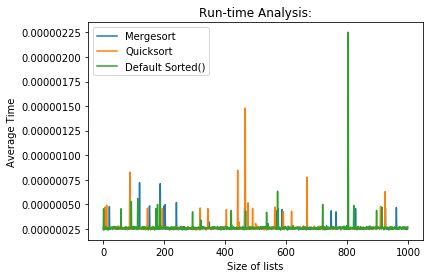

In [43]:
import math
from createlist import create
from funtime import timeme
from quicksort import quicksort
from mergesort import mergesort
from matplotlib import pyplot

def analysis(n, function):
    data = []

    for z in range(n):
        testlist = create(iterations=z, floor=1, ceiling=20, countby=2)

        av_extime = average_extime(testlist, function)
        data.append(av_extime)

        #print(z)

    return data


def average_extime(testlist, function):
    extimes = []

    for i in range(100):
        function_returned, function_time = timeme(function)

        #print(function_time)

        if function_time > 0:
            extimes.append(function_time)

    #print(len(extimes))

    average_extimes = sum(extimes) / len(extimes)

    return average_extimes

def main():
    testlist = [1]
    mfunction = mergesort
    qfunction = quicksort
    dfunction = sorted

    n = 1000

    mergesort_data = analysis(n, mfunction)
    quicksort_data = analysis(n, qfunction)
    default_data = analysis(n, dfunction)

    title = "Run-time Analysis:"
    label_y = "Average Time"
    label_x = "Size of lists"

    mergesort_plot = pyplot.plot(mergesort_data, label='Mergesort')
    quicksort_plot = pyplot.plot(quicksort_data, label='Quicksort')
    default_data = pyplot.plot(default_data, label='Default Sorted()')

    pyplot.legend(loc='best')
    pyplot.ylabel(label_y)
    pyplot.xlabel(label_x)
    pyplot.title(title)
    pyplot.grid(False)

    pyplot.show()

if __name__ == "__main__":
    main()